# Linear Classification and Gradient Descent

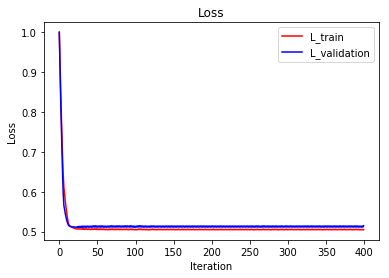

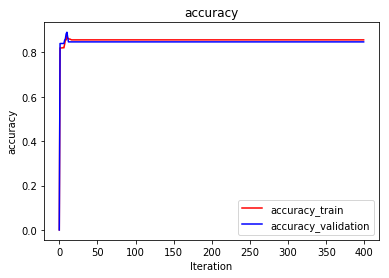

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
%matplotlib inline

#load data
def get_data(path):
    data = load_svmlight_file(path)
    return data[0], data[1]

#calculate the loss
def cal_Loss(X,W,y,lambdal,W_0):
    preY = np.dot(X,W)
    diifY = np.ones(y.shape[0]) - y * preY
    diifY[diifY < 0] =0
    Loss =np.sum(diifY) / X.shape[0] + np.dot(W_0,W_0.T)/2*lambdal
    return Loss

#calculate the gradient
def cal_G(X,W,y,lambdal,W_0):
    preY = np.dot(X,W)
    diifY = np.ones(y.shape[0]) - y * preY
    y_get = y.copy()
    y_get[diifY <= 0] =0
    G = -np.dot(y_get,X) / X.shape[0] + W_0 *lambdal
    return G

#calculate the accuracy
def cal_Accuracy(X,W,y):
    preY = np.dot(X,W)
    count = np.sum(preY * y >0)
    Accuracy = count / X.shape[0]
    return Accuracy

def main():
    #load data
    path = './australian_scale.txt'
    X, y = get_data(path)
    X = X.toarray()
    #y = W^T *X + b -> y = W_extend^T * [X,1]
    column = np.ones((X.shape[0]))
    X = np.column_stack((X,column))
    #print(X.shape)
    #print(y.shape)
    
    #split data
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=24)
    #m, n = x_train.shape()
    N=X_train.shape[1]
    W_zeros = np.zeros(N)
    
    lr = 0.1
    iteration = 400 
    lambdal = 0.5
    
    #get different kinds of initial data
    W = W_zeros
    
    Loss_train = np.zeros(iteration)
    Loss_validation = np.zeros(iteration)
    accuracy_train = np.zeros(iteration)
    accuracy_validation = np.zeros(iteration)
    for j in range(0,iteration):
        W_0 = W.copy()
        W_0[N-1]= 0
        #the training loss
        Loss_train[j] = cal_Loss(X_train,W,y_train,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_train,W,y_train,lambdal,W_0)
        #the validation loss
        Loss_validation[j] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        accuracy_train[j] = cal_Accuracy(X_train,W,y_train)
        accuracy_validation[j] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W
        W = W - G * lr
    #draw the result
    #loss
    plt.figure(1)
    plot1,  = plt.plot(np.arange(0, iteration), Loss_train, 'r', label='L_train')
    plot2,  = plt.plot(np.arange(0, iteration), Loss_validation, 'b', label='L_validation')
    plt.title('Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend([plot1, plot2], ['L_train', 'L_validation'])
    plt.show()
    #accuracy
    plt.figure(2)
    plot1, = plt.plot(np.arange(0, iteration), accuracy_train, 'r', label='accuracy_train')
    plot2, = plt.plot(np.arange(0, iteration), accuracy_validation, 'b', label='accuracy_validation')
    plt.title('accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('accuracy')
    plt.legend([plot1, plot2], ['accuracy_train', 'accuracy_validation'])
    plt.show()
# Execute main() only when this script is executed from the command line
if __name__ == "__main__":
    main()